In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import StandardScaler


In [90]:
df=pd.read_csv('/content/insurance.csv')


In [91]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [92]:
df.shape

(1338, 7)

In [93]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [94]:
df2=pd.get_dummies(df,drop_first=True)

In [95]:
df2.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False


In [96]:
x_train,x_test,y_train,y_test=train_test_split(df2.drop('charges',axis=1),df2['charges'],test_size=.2,random_state=42)

In [97]:
x_train

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
560,46,19.950,2,False,False,True,False,False
1285,47,24.320,0,False,False,False,False,False
1142,52,24.860,0,False,False,False,True,False
969,39,34.320,5,False,False,False,True,False
486,54,21.470,3,False,False,True,False,False
...,...,...,...,...,...,...,...,...
1095,18,31.350,4,False,False,False,False,False
1130,39,23.870,5,False,False,False,True,False
1294,58,25.175,0,True,False,False,False,False
860,37,47.600,2,False,True,False,False,True


In [98]:
y_train

,charges
560,9193.83850
1285,8534.67180
1142,27117.99378
969,8596.82780
486,12475.35130
...,...
1095,4561.18850
1130,8582.30230
1294,11931.12525
860,46113.51100


In [99]:
model=LinearRegression()


In [100]:
train_model=model.fit(x_train,y_train)

In [101]:
predict_charges=model.predict(x_test)

In [102]:
predict_charges

array([ 8969.55027444,  7068.74744287, 36858.41091155,  9454.67850053,
       26973.17345656, 10864.11316424,   170.28084136, 16903.45028662,
        1092.43093614, 11218.34318352, 28101.68455267,  9377.73460205,
        5263.0595179 , 38416.04221107, 40255.82339284, 37098.25353123,
       15240.39392306, 35912.88264434,  9112.52398703, 31461.92108909,
        3847.68845883, 10130.12001517,  2370.54189389,  7140.21550828,
       11301.76782638, 12961.65366224, 14509.47251876,  6159.8976107 ,
        9963.85857263,  2177.85718217,  9115.93673494, 13073.68932159,
        4561.82376202,  3408.20756033,  4459.81359745, 13032.06505076,
        1979.99357292,  8813.28303302, 33271.29124448, 32585.51583927,
        3908.76090964,  4326.10774721, 14142.81326533, 11423.45494846,
        8774.13955311, 12097.28051001,  5281.57353499,  3150.5596042 ,
       35494.46461214,  9150.1124786 , 15836.84575621,  2343.57470069,
       12364.78414194,  1482.29488266, 13389.06105161, 12573.57395972,
      

In [103]:
r2_score(y_test,predict_charges)

0.7835929767120724

In [104]:
mse=mean_squared_error(y_test,predict_charges)

In [105]:
mse

33596915.85136145

In [106]:
rmse=np.sqrt(mse)
rmse

np.float64(5796.284659276273)

In [107]:
ridge=Ridge(alpha=.01)

In [108]:
ridge.fit(x_train,y_train)

Ridge(alpha=0.01)

In [109]:
ridge_predict=ridge.predict(x_test)

In [110]:
ridge_predict

array([ 8969.73326111,  7068.97045197, 36857.21803081,  9454.98706708,
       26972.13717807, 10864.41698453,   170.55322523, 16903.68168188,
        1092.65362911, 11218.63951709, 28100.67860639,  9378.03712659,
        5263.39778605, 38415.04194931, 40254.78325833, 37097.25348322,
       15240.67009651, 35911.80237909,  9112.83252534, 31460.76906519,
        3848.07204311, 10130.43394298,  2370.89679962,  7140.40097405,
       11301.98346492, 12961.79234485, 14509.65746096,  6160.15304525,
        9964.0345732 ,  2178.29039751,  9116.19417309, 13073.86755356,
        4562.16088008,  3408.47985466,  4460.16099991, 13032.28575603,
        1980.27853462,  8813.51759064, 33270.13294102, 32584.54006851,
        3909.06597186,  4326.44033991, 14143.00971634, 11423.72310097,
        8774.54189439, 12097.56913865,  5281.82838073,  3150.85183846,
       35493.48404387,  9150.51297715, 15837.09805478,  2344.01483531,
       12364.97985589,  1482.59782988, 13389.41101805, 12573.81214383,
      

In [111]:
r2_score(y_test,ridge_predict)

0.7835900459858819

In [112]:
mse=mean_squared_error(y_test,ridge_predict)

In [113]:
mse

33597370.84288487

In [114]:
rmse=np.sqrt(mse)
rmse

np.float64(5796.32390769226)

In [115]:
lasso=Lasso(alpha=100)

In [116]:
lasso.fit(x_train,y_train)

Lasso(alpha=100)

In [117]:
lasso_predict=lasso.predict(x_test)

In [118]:
lasso_predict

array([ 8628.42362606,  7171.19486001, 36366.26756868,  9432.65670668,
       26476.01631252, 11205.76373891,   379.11617777, 16904.12796119,
         987.01123174, 11157.68305496, 27939.51650562,  9362.89137183,
        5601.56210844, 37868.3708339 , 39900.81539989, 36653.86320623,
       15339.18042299, 35540.54556352,  9455.50571264, 30987.56236058,
        4180.52671991, 10528.06791693,  2940.4423348 ,  6763.90457077,
       11228.65576665, 12645.57544593, 14968.44973222,  6078.31735063,
        9603.57153427,  2599.85634342,  9413.62135231, 13136.22774262,
        4904.71366066,  3452.17516708,  4966.3581136 , 12654.86741774,
        2516.30702019,  9288.0645163 , 32760.74870154, 32258.61410402,
        4170.47960395,  4380.37045945, 14534.26730165, 11580.90884509,
        8990.0108443 , 12606.52096308,  5227.81422442,  3584.5645237 ,
       35027.53531005,  9335.318336  , 16126.6385226 ,  2712.68133379,
       12261.78044595,  1295.64270734, 13726.29481908, 12161.80036736,
      

In [119]:
r2_score(y_test,lasso_predict)

0.7794166946394485

In [120]:
mse=mean_squared_error(y_test,lasso_predict)

In [121]:
mse

34245278.345488146

In [122]:
rmse=np.sqrt(mse)
rmse

np.float64(5851.946543286956)

In [128]:

scaler=StandardScaler()



In [130]:
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [131]:
scaled_model=LinearRegression()

In [132]:
scaled_model.fit(x_train_scaled,y_train)

LinearRegression()

In [140]:
scaled_model_predect=scaled_model.predict(x_test_scaled)

In [134]:
scaled_model_predect

array([ 8969.55027444,  7068.74744287, 36858.41091155,  9454.67850053,
       26973.17345656, 10864.11316424,   170.28084136, 16903.45028662,
        1092.43093614, 11218.34318352, 28101.68455267,  9377.73460205,
        5263.0595179 , 38416.04221107, 40255.82339284, 37098.25353123,
       15240.39392306, 35912.88264434,  9112.52398703, 31461.92108909,
        3847.68845883, 10130.12001517,  2370.54189389,  7140.21550828,
       11301.76782638, 12961.65366224, 14509.47251876,  6159.8976107 ,
        9963.85857263,  2177.85718217,  9115.93673493, 13073.68932159,
        4561.82376202,  3408.20756033,  4459.81359745, 13032.06505076,
        1979.99357292,  8813.28303302, 33271.29124448, 32585.51583927,
        3908.76090964,  4326.10774721, 14142.81326533, 11423.45494846,
        8774.13955311, 12097.28051001,  5281.57353499,  3150.5596042 ,
       35494.46461214,  9150.1124786 , 15836.84575621,  2343.57470069,
       12364.78414194,  1482.29488266, 13389.06105161, 12573.57395972,
      

In [138]:
r2_score(y_test,scaled_model_predect)

0.7835929767120722

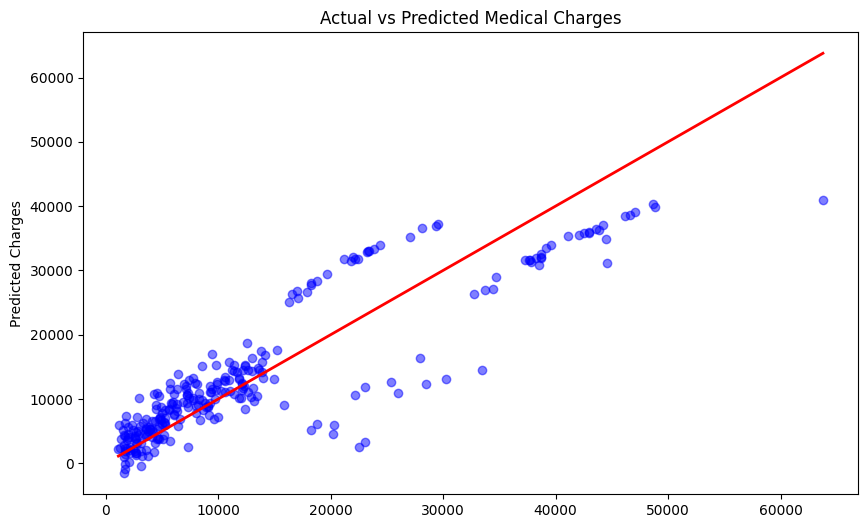

In [141]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, scaled_model_predect, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.ylabel("Predicted Charges")
plt.title("Actual vs Predicted Medical Charges")
plt.show()